In [4]:
!pip3 install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Running setup.py clean for pickle5
Failed to build pickle5
    Running setup.py install for pickle5: started
    Running setup.py install for pickle5: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\nojus\Documents\GitHub\Project-A\venv\Scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\nojus\\AppData\\Local\\Temp\\pip-install-cj0y3mhw\\pickle5_11184aeb8d614ecaaa61dde0856bc058\\setup.py'"'"'; __file__='"'"'C:\\Users\\nojus\\AppData\\Local\\Temp\\pip-install-cj0y3mhw\\pickle5_11184aeb8d614ecaaa61dde0856bc058\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\nojus\AppData\Local\Temp\pip-wheel-siixhbn8'
       cwd: C:\Users\nojus\AppData\Local\Temp\pip-install-cj0y3mhw\pickle5_11184aeb8d614ecaaa61dde0856bc058\
  Complete output (36 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating

In [ ]:
!pip3 install --upgrade pandas

     |████████████████████████████████| 11.3 MB 5.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [22]:
import os
import json
import pickle
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
cd \data


In [23]:
from os.path import isfile
filename = 'ETH-USD_2016-01-01_UTC2021-11-07_UTC.data'
filename = os.path.join('data', filename)
if isfile(filename):
  with open(filename, 'rb') as f:
    data = pickle.load(f)
else:
  print('failed')

In [24]:
df = pd.DataFrame(data)['Close']

In [ ]:
list_of_values = []
for idx, row in enumerate(df):
  data_dict = {'X':[], 'Y':[]}
  X = np.empty(6)
  Y = np.empty(1)
  if idx > len(df)-10:
    break
  for i in range(7):
    if i == 6:
      data_dict['Y'].append(df[idx+i])
      np.append(Y, df[idx+1])
      break
    data_dict['X'].append(df[idx+i])
    np.append(X, df[idx+i])
  #print(data_dict['X'])
  data_dict['X'] = X.flatten() #np.asarray(data_dict['X']).astype('float32')
  data_dict['Y'] = Y.flatten() #np.asarray(data_dict['Y']).astype('float32')
  list_of_values.append(data_dict)


In [253]:
list_of_values = []
hist_to_train = 7
for idx, row in enumerate(df):
  data_dict = {}
  if idx >= len(df)-hist_to_train:
    break
  for i in range(hist_to_train):
    data_dict[i] = (df[idx+i])
  list_of_values.append(data_dict)
df = pd.DataFrame(list_of_values, dtype="float32")

In [ ]:
print(df)

In [25]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(df, test_size=0.05)

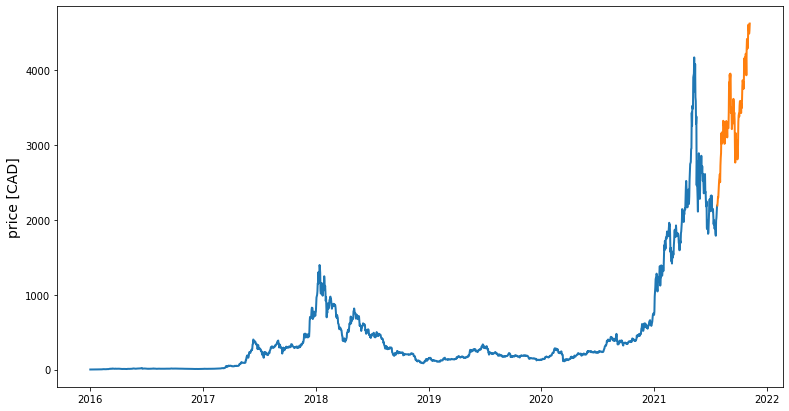

In [26]:
target_col = 0
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    #for item in line1:
    ax.plot(line1, linewidth=lw)
    #for item in line2:
    ax.plot(line2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
line_plot(train, test, 'training', 'test', title='')

In [27]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1
def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [28]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    
    return np.array(window_data)

In [29]:
def prepare_data(df, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[window_len:].values
    y_test = test_data[window_len:].values
    if zero_base:
        y_train = y_train / train_data[:-window_len].values - 1
        y_test = y_test / test_data[:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

In [30]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape =(window_len, 1)))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    
    return model

In [31]:
np.random.seed(42)
window_len = 15
test_size = 0.05
zero_base = False
lstm_neurons = 100
epochs = 2000
batch_size = 64
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [32]:
train, test, X_train, X_test, y_train, y_test = prepare_data(df, window_len=window_len, zero_base=zero_base, test_size=test_size)
#X_train, y_train = df['X'][:1500], df['Y'][:1500]
#X_train = X_train.to_numpy(dtype='float32')
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,optimizer=optimizer)

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/2000
32/32 [==============================] - 3s 15ms/step - loss: 580640.3125
Epoch 2/2000
32/32 [==============================] - 1s 16ms/step - loss: 577280.8125

In [64]:
preds = model.predict(X_test[:15])

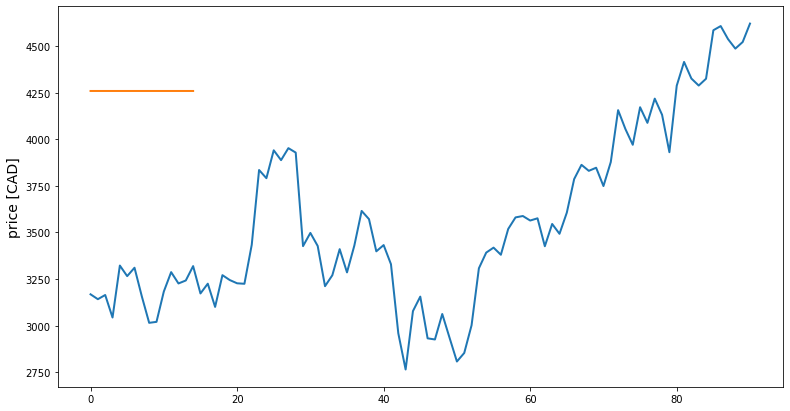

In [65]:
line_plot(y_test, preds, 'training', 'test', title='')

In [60]:
predictions = []
n_preds = 2
#extract_window_data(test_data, window_len, zero_base)
X_data = X_test[0]
for i in range(n_preds):
  y = model.predict(X_data)
  predictions.append(y)
  np.append(X_data, y)
  #np.delete(X_data, 1, 0)
  print(len(predictions))

91
1
2


In [45]:
assert len(y_test) == len(X_test)

In [68]:
print(X_test[0])
print(y_test[0])


[2191.3737793  2233.36669922 2298.33349609 2296.54541016 2380.95678711
 2466.96142578 2536.20996094 2561.85205078 2610.15332031 2502.34960938
 2724.61987305 2827.32885742 2890.94165039 3157.23876953 3013.73266602]
3167.856201171875


In [69]:
print(model.predict[X_test[0]])


TypeError: 'method' object is not subscriptable

In [ ]:
model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)